2.ダミーデータの作成
【問題1】乱数の作成
---
>平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。
>多次元の正規分布による乱数はnp.random.multivariate_normal()を使うことで作成できます。
numpy.random.multivariate_normal — NumPy v1.19 Manual
作成したndarrayのshapeは(500, 2)になります。
《シード値について》
実行ごとに値が変わらないように、np.random.seed()により乱数のシード値を固定しておきましょう。今回シード値は0を使うことにします。

numpy公式ドキュメント：
https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

In [224]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [225]:
mean = [-3, 0] #平均
cov = [[1.0, 0.8],[0.8, 1.0]] #出力したい形式
np.random.seed(0)
random_multi = np.random.multivariate_normal(mean, cov, 500)
random_multi.shape

(500, 2)

【問題2】散布図による可視化
---
>問題1で作成したデータ点を散布図により可視化してください。
散布図はmatplotlibのplt.scatter()を使うことで描けます。

描画に参考にしたURL:
https://pythondatascience.plavox.info/matplotlib/%E6%95%A3%E5%B8%83%E5%9B%B3
```
matplotlib.pyplot.scatter(x, y, s=20, c=None, marker='o', cmap=None, norm=None,
                          vmin=None, vmax=None, alpha=None, linewidths=None,
                          verts=None, edgecolors=None, hold=None, data=None,
                          **kwargs)
```

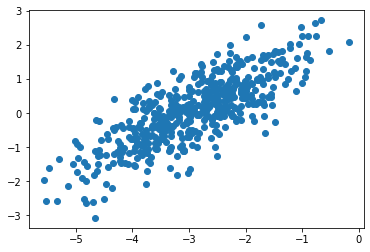

In [226]:
random_multi_div_1, random_multi_div_2 = np.hsplit(random_multi, 2)
plt.scatter(random_multi_div_1, random_multi_div_2)

【問題3】ヒストグラムによる可視化
---
>問題1で作成したデータをヒストグラムにより可視化してください。
ヒストグラムはplt.hist()を使うことで描けます。

(-6.0, 3.0)

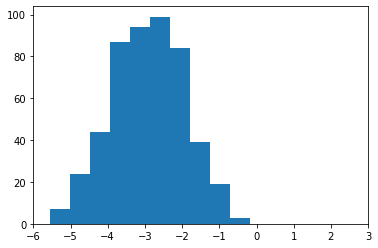

In [227]:
plt.hist(random_multi_div_1)
plt.xlim(-6, 3) 

(-6.0, 3.0)

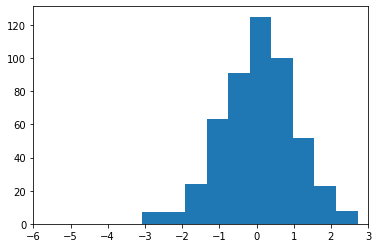

In [228]:
plt.hist(random_multi_div_2)
plt.xlim(-6, 3) 

それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。

参考URL:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
left, right = xlim()  # return the current xlim
xlim((left, right))   # set the xlim to left, right
xlim(left, right)     # set the xlim to left, right

【問題4】データの追加
---
>新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。
そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題4のものは1を表示してください。
《作成例》
課題のはじめに紹介した図と同じものです。

In [229]:
mean = [0, -3] #平均
cov = [[1.0, 0.8],[0.8, 1.0]] #出力したい形式
random_multi_v2 = np.random.multivariate_normal(mean, cov, 500)

<function matplotlib.pyplot.show(*args, **kw)>

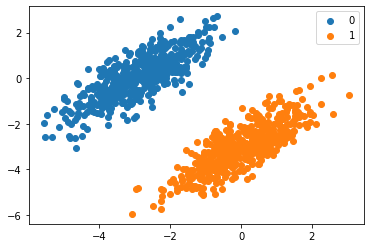

In [230]:
random_multi_div_v2_1, random_multi_div_v2_2 = np.hsplit(random_multi_v2, 2)
plt.scatter(random_multi_div_1, random_multi_div_2,label="0")
plt.scatter(random_multi_div_v2_1, random_multi_div_v2_2,label="1")
plt.legend()
plt.show

【問題5】データの結合
---
>データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを結合し、(1000, 2)のndarrayとしてください。結合はnp.concatenate()やnp.vstack()を使うことで行えます。
参考URL:
https://techacademy.jp/magazine/33340

In [231]:
random_multi_cnt_v1v2 = np.concatenate([random_multi,random_multi_v2], axis=0)

In [232]:
random_multi_cnt_v1v2.shape

(1000, 2)

【問題6】ラベル付け
---
>ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。問題1のものには0、問題4のものには1を対応させます。
0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。
機械学習に使用するデータセットはこのような形になっていることが多いです。
《作成例》
データが3個+3個の場合は以下のような(6, 3)のndarrayになります。
参考URL: https://www.sejuku.net/blog/68941

In [236]:
#ラベルの作成を行った。zerosとones 参考URL https://deepage.net/features/numpy-zeros.html
label_zero = np.zeros(500)
label_zero = label_zero.reshape(500, 1)
label_ones = np.ones(500)
label_ones = label_ones.reshape(500, 1)

In [237]:
#ゼロをappendして３＊３の配列を作成する
labeled_zero_random_multi = np.append(random_multi, label_zero, axis=1) 

In [238]:
#イチをappendして３＊３の配列を作成する
labeled_one_random_multi = np.append(random_multi_v2, label_ones, axis=1) 

In [240]:
#３＊３の配列を結合させる
laveled_random_multi_cnt_v1v2 = np.concatenate([labeled_zero_random_multi, labeled_one_random_multi], axis=0)

In [242]:
#出力
laveled_random_multi_cnt_v1v2

array([[-4.80006782, -1.54698618,  0.        ],
       [-4.63714503, -0.21987973,  0.        ],
       [-4.46267867, -2.08076347,  0.        ],
       ...,
       [-0.2185878 , -3.15676476,  1.        ],
       [-1.37970304, -4.27950068,  1.        ],
       [ 1.49786804, -2.33126243,  1.        ]])